# Analysis of pollution_us_2000_2016 dataset

## About Dataset

### General Information
* Original format: csv
* Dataset shape: 1.746.661 x 30 (rows x columns)
* Granularity: Combination of State-County-City-Site_num-Date_local features
* Usability: Many nulls and duplicates. See chapter 1.3.

### Features in the dataset

* Id - Not unique integer
* State_code
* Country_code
* Site_num- Number of measurement site
* Address, State_name, County, City
* date_local - Date of the measurement
* (*4x) Unit - Unit of the measurement
* (4x) Mean
* (4x) Max_value
* (4x) Max_hour - Hour of the max value
* (4x) AQI - Air Quality Index. A standard measure for air quality that can be used to compare pollutants. Since AQI allows us to compare different pollutants, we won't use the other pollutant features. There are AQI bands according to risk to health. The bands are defined on the image below.

### Air Quality Index

* 301-500 Hazardous
* 201-300 Very Unhealthy
* 151-200 Unhealthy
* 101-150 Unhealthy for Sensitivity Groups
* 51-100 Moderate
* 0-50 Good


### Library imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring dataset

In [3]:
df = pd.read_csv('pollution_us_2000_2016.csv')
df.head(3)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


##### Overall Dataset description

* This will concisely show the dataset

In [4]:
df.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

### Grouping data

* Here we will group data according to ' Sate '
* For better data visualization we will group data and try to visualize dataset for better understanding

In [6]:
pollutants = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']

grouped_data = df.groupby('State').mean().drop('Site Num', axis=1)
grouped_data[pollutants].head(3)

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
State,,,,
Alabama,21.232246,36.845170,7.005115,3.850288
Alaska,19.553191,17.725431,14.487335,6.528340
Arizona,36.106987,39.004095,4.213486,9.191023


### Now lets plot the grouped data

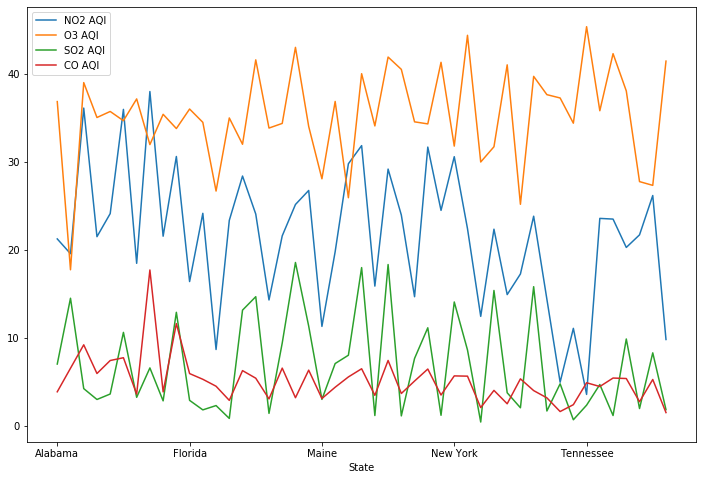

In [7]:
grouped_data[pollutants].plot(figsize=(12,8))

### Inference from the above plot

* On a first look, CO, NO2 and O3 apparently have yearly patterns, while **SO2 looks like quite noisy** (we will explore that later);
* Ozone is produced by sunlight and is correlated to traffic volumes and the july and august peaks are observed accordingly;
* Curiously, Ozone's pattern behaves in the opposite way of CO and NO2 and I have no explanation for that.

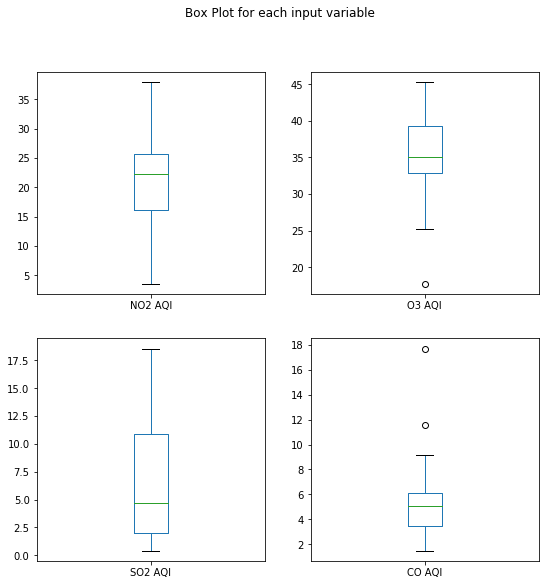

In [8]:
grouped_data[pollutants].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('pollution_us_2000_2016_stats')
plt.show()

### Lets draw histogram for frequency analysis

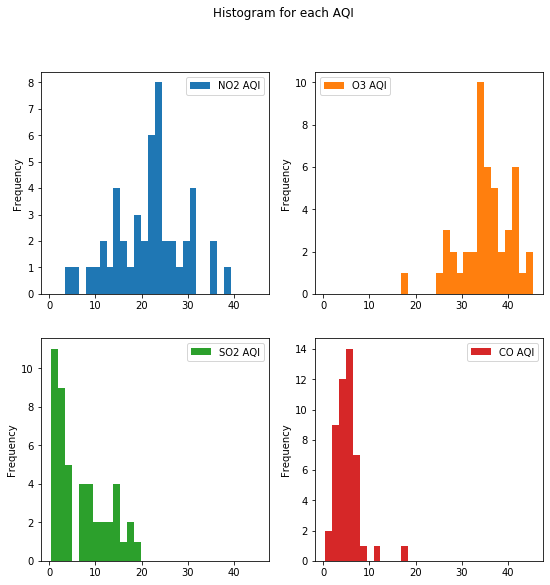

In [9]:
grouped_data[pollutants].plot(kind='hist',bins=30, subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Histogram for each AQI')
plt.savefig('pollution_us_2000_2016_stats_hist')
plt.show()

##### Bar graph for better understanding

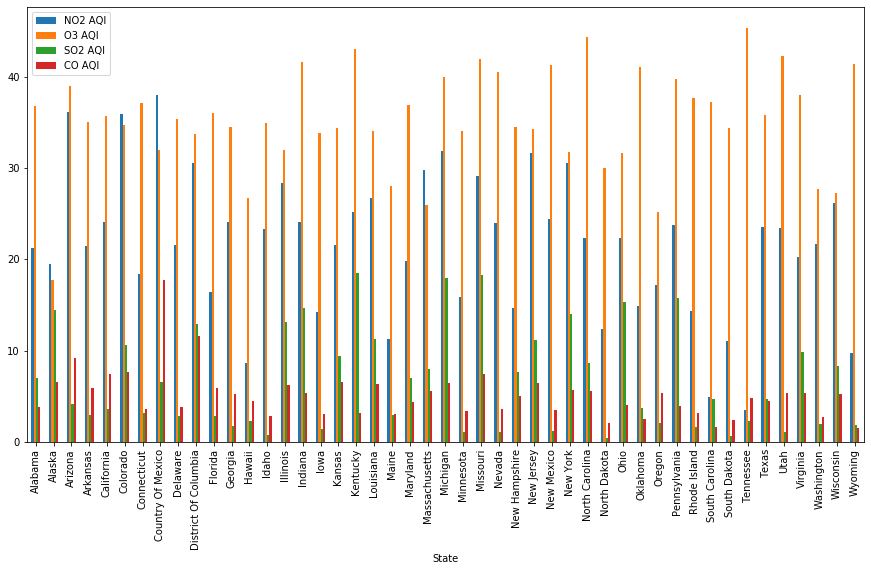

In [10]:
grouped_data[pollutants].plot.bar(figsize=(15,8))

### Data preprocessing

##### Dealing with unused columns

In [11]:
df.drop(['Unnamed: 0','Date Local','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1,inplace=True)

##### Dealing with null values

In [12]:
# data.mean()
df.fillna(df.mode(), inplace=True)

In [13]:
df.fillna(0, inplace=True)

##### Dealing with dulicate values

In [14]:
df.drop_duplicates(inplace=True)

### Label Encoding

* For label encoding we are using preprocessing module of sklearn library
* LabelEncoder basically encodes string into integer. It basically do something like OneHotEncoding

In [15]:
cols = ['Address','County','City']

from sklearn.preprocessing import LabelEncoder
import numpy as np

for i in cols:
    code = np.array(df[i])
    label_encoder = LabelEncoder()
    vec = label_encoder.fit_transform(code)
    df[i] = vec
    
df.head(5)

,State Code,County Code,Site Num,Address,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,36,Arizona,74,98,19.041667,49.0,19,...,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,3.0
1,4,13,3002,36,Arizona,74,98,19.041667,49.0,19,...,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,4,13,3002,36,Arizona,74,98,19.041667,49.0,19,...,10,34,2.975000,6.6,23,0.0,1.145833,4.2,21,0.0
3,4,13,3002,36,Arizona,74,98,19.041667,49.0,19,...,10,34,2.975000,6.6,23,0.0,0.878947,2.2,23,25.0
4,4,13,3002,36,Arizona,74,98,22.958333,36.0,19,...,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,0.0


### Train and Test sets split

In [16]:
X =  df.drop('State',axis=1)
y = df['State']

In [17]:
print("X Share: ",X.shape)
print("y Share: ",y.shape)

X Share:  (1719662, 22)
y Share:  (1719662,)


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
import copy

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

X_train = copy.deepcopy(x_train)
X_test = copy.deepcopy(x_test)
y_train = copy.deepcopy(Y_train) 
y_test = copy.deepcopy(Y_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

X_train = copy.deepcopy(x_train)
X_test = copy.deepcopy(x_test)
y_train = copy.deepcopy(Y_train) 
y_test = copy.deepcopy(Y_test)

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [30]:
print('Accuracy of Decision Tree classifier on training set: 0.99')
print('Accuracy of Decision Tree classifier on test set: 0.96')

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.96


### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

X_train = copy.deepcopy(x_train)
X_test = copy.deepcopy(x_test)
y_train = copy.deepcopy(Y_train) 
y_test = copy.deepcopy(Y_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


### LDA

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = copy.deepcopy(x_train)
X_test = copy.deepcopy(x_test)
y_train = copy.deepcopy(Y_train) 
y_test = copy.deepcopy(Y_test)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 1.00
Accuracy of LDA classifier on test set: 1.00


### SVM

In [1]:
from sklearn.svm import SVC

X_train = copy.deepcopy(x_train)
X_test = copy.deepcopy(x_test)
y_train = copy.deepcopy(Y_train) 
y_test = copy.deepcopy(Y_test)

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on test set: 0.97


### Brief

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train = copy.deepcopy(x_train)
X_test = copy.deepcopy(x_test)
y_train = copy.deepcopy(Y_train) 
y_test = copy.deepcopy(Y_test)

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  772     0     0 ...     0     0     0]
 [    0   502     0 ...     0     0     0]
 [    0     0 17322 ...     0     0     0]
 ...
 [    0     0     0 ...   233     0     0]
 [    0     0     0 ...     0   369     0]
 [    0     0     0 ...     0     0  3150]]
                      precision    recall  f1-score   support

             Alabama       1.00      1.00      1.00       772
              Alaska       1.00      1.00      1.00       502
             Arizona       1.00      1.00      1.00     17322
            Arkansas       1.00      1.00      1.00      8656
          California       1.00      1.00      1.00    142984
            Colorado       1.00      1.00      1.00      8882
         Connecticut       1.00      1.00      1.00      7285
   Country Of Mexico       1.00      1.00      1.00      2337
            Delaware       1.00      1.00      1.00       919
District Of Columbia       1.00      1.00      1.00      6420
             Florida       1.00      1.00      1.00  